<a href="https://colab.research.google.com/github/Vangzbill/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama      : Sabilla Luthfi Rahmadhan

No Absen  : 19

Kelas     : TI-3G
***

# **Tugas Praktikum**

## Import Library

In [5]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from base64 import b64decode, b64encode
import PIL
import io

#akses drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Feature Matching

In [6]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

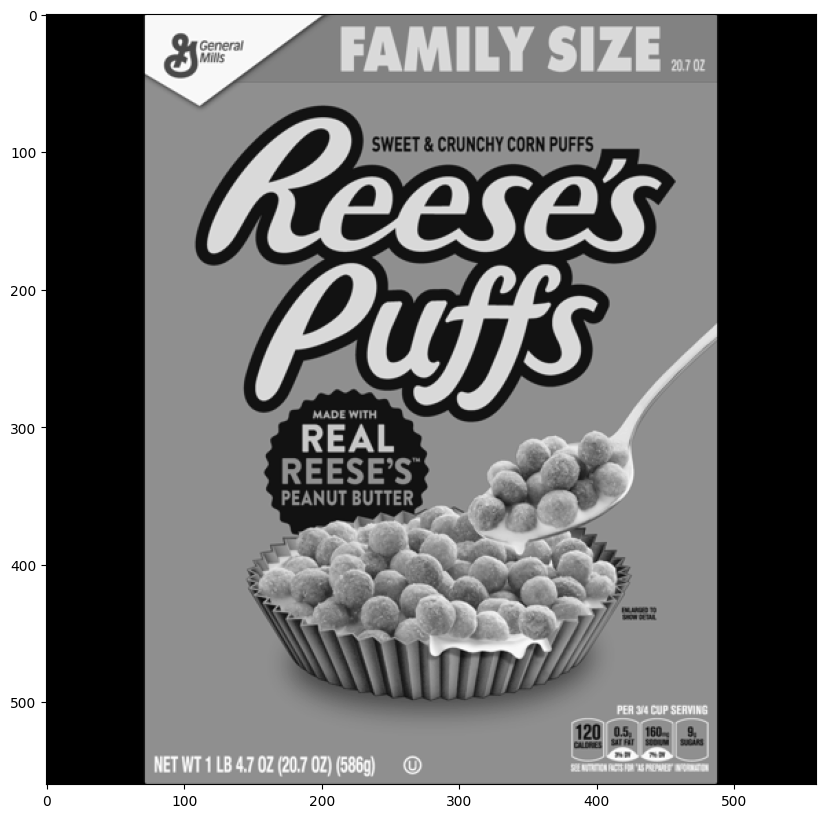

In [7]:
reeses = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/reeses_puffs.png',0)
display(reeses)

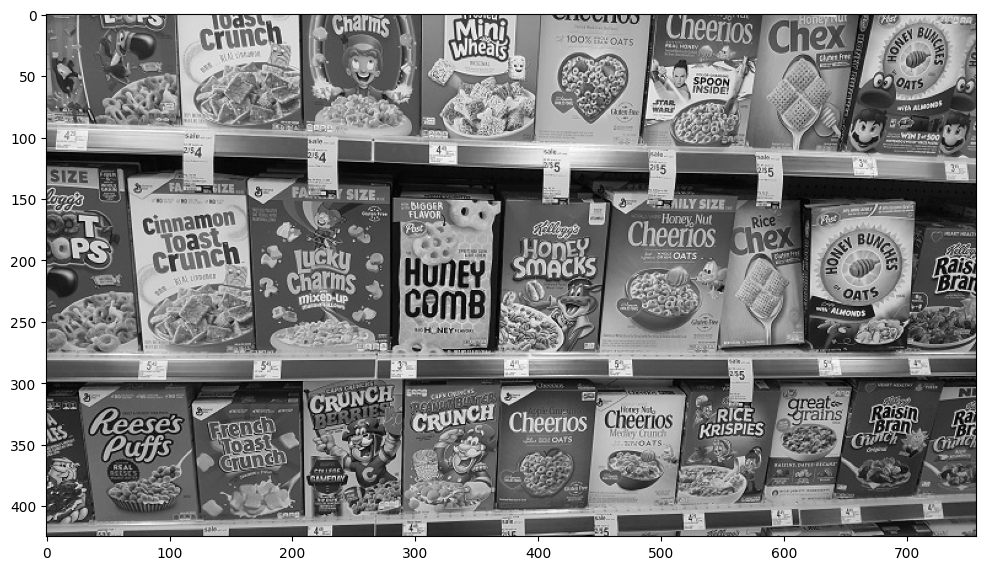

In [8]:
cereals = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/many_cereals.jpg',0)
display(cereals)

In [9]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)
bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck = True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

71.0

In [10]:
len(matches)

139

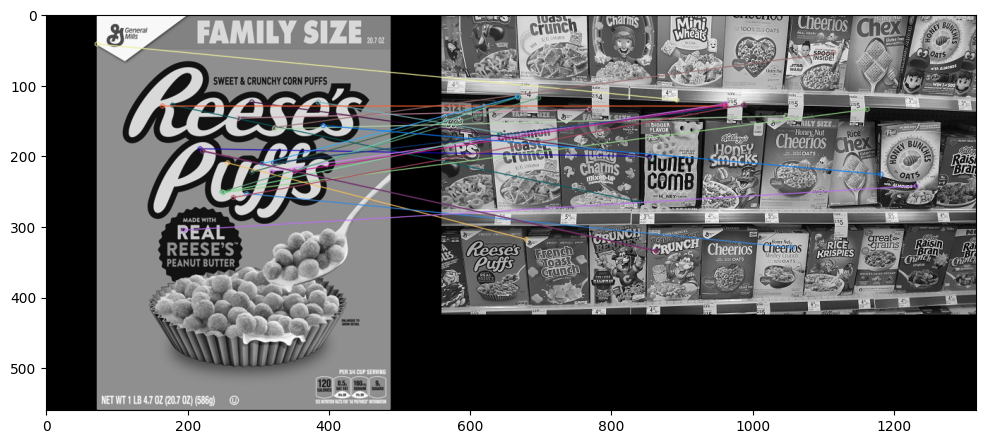

In [12]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [13]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals, None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

#Makin kecil jarak makin cocok
#ratio match1 < 75% Match2
for match1,match2 in matches:
  #jika jarak match1 lebih kecil dari jarak 75% match2
  #descriptor disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [14]:
len(matches)

1501

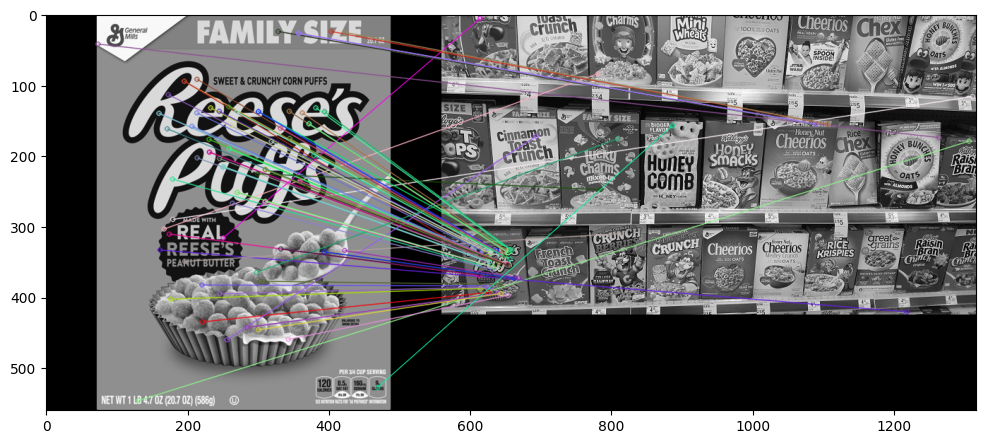

In [15]:
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches)

## Face Detection

In [16]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/haarcascades/haarcascade_frontalface_alt.xml')


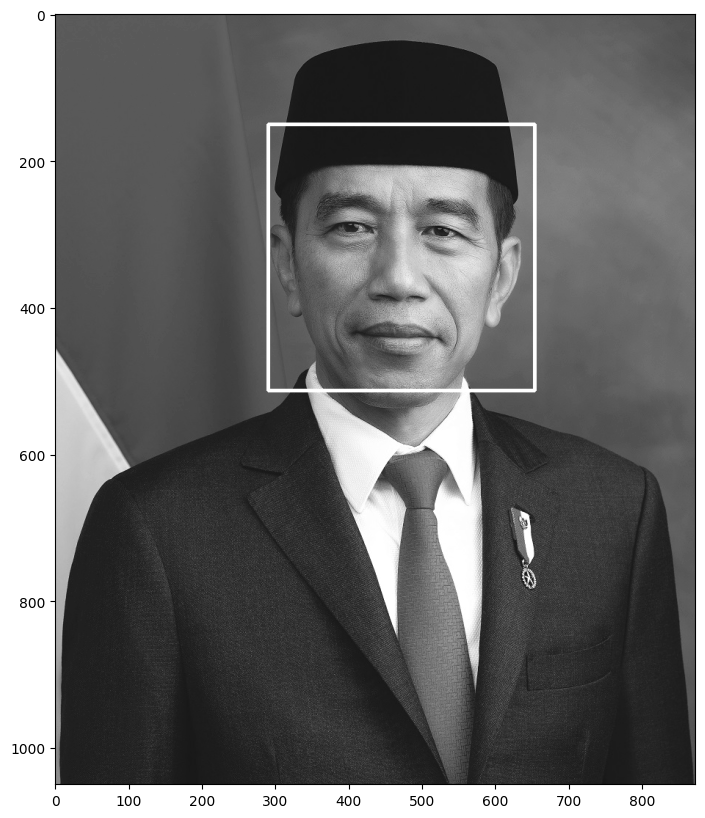

In [17]:
jokowi = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

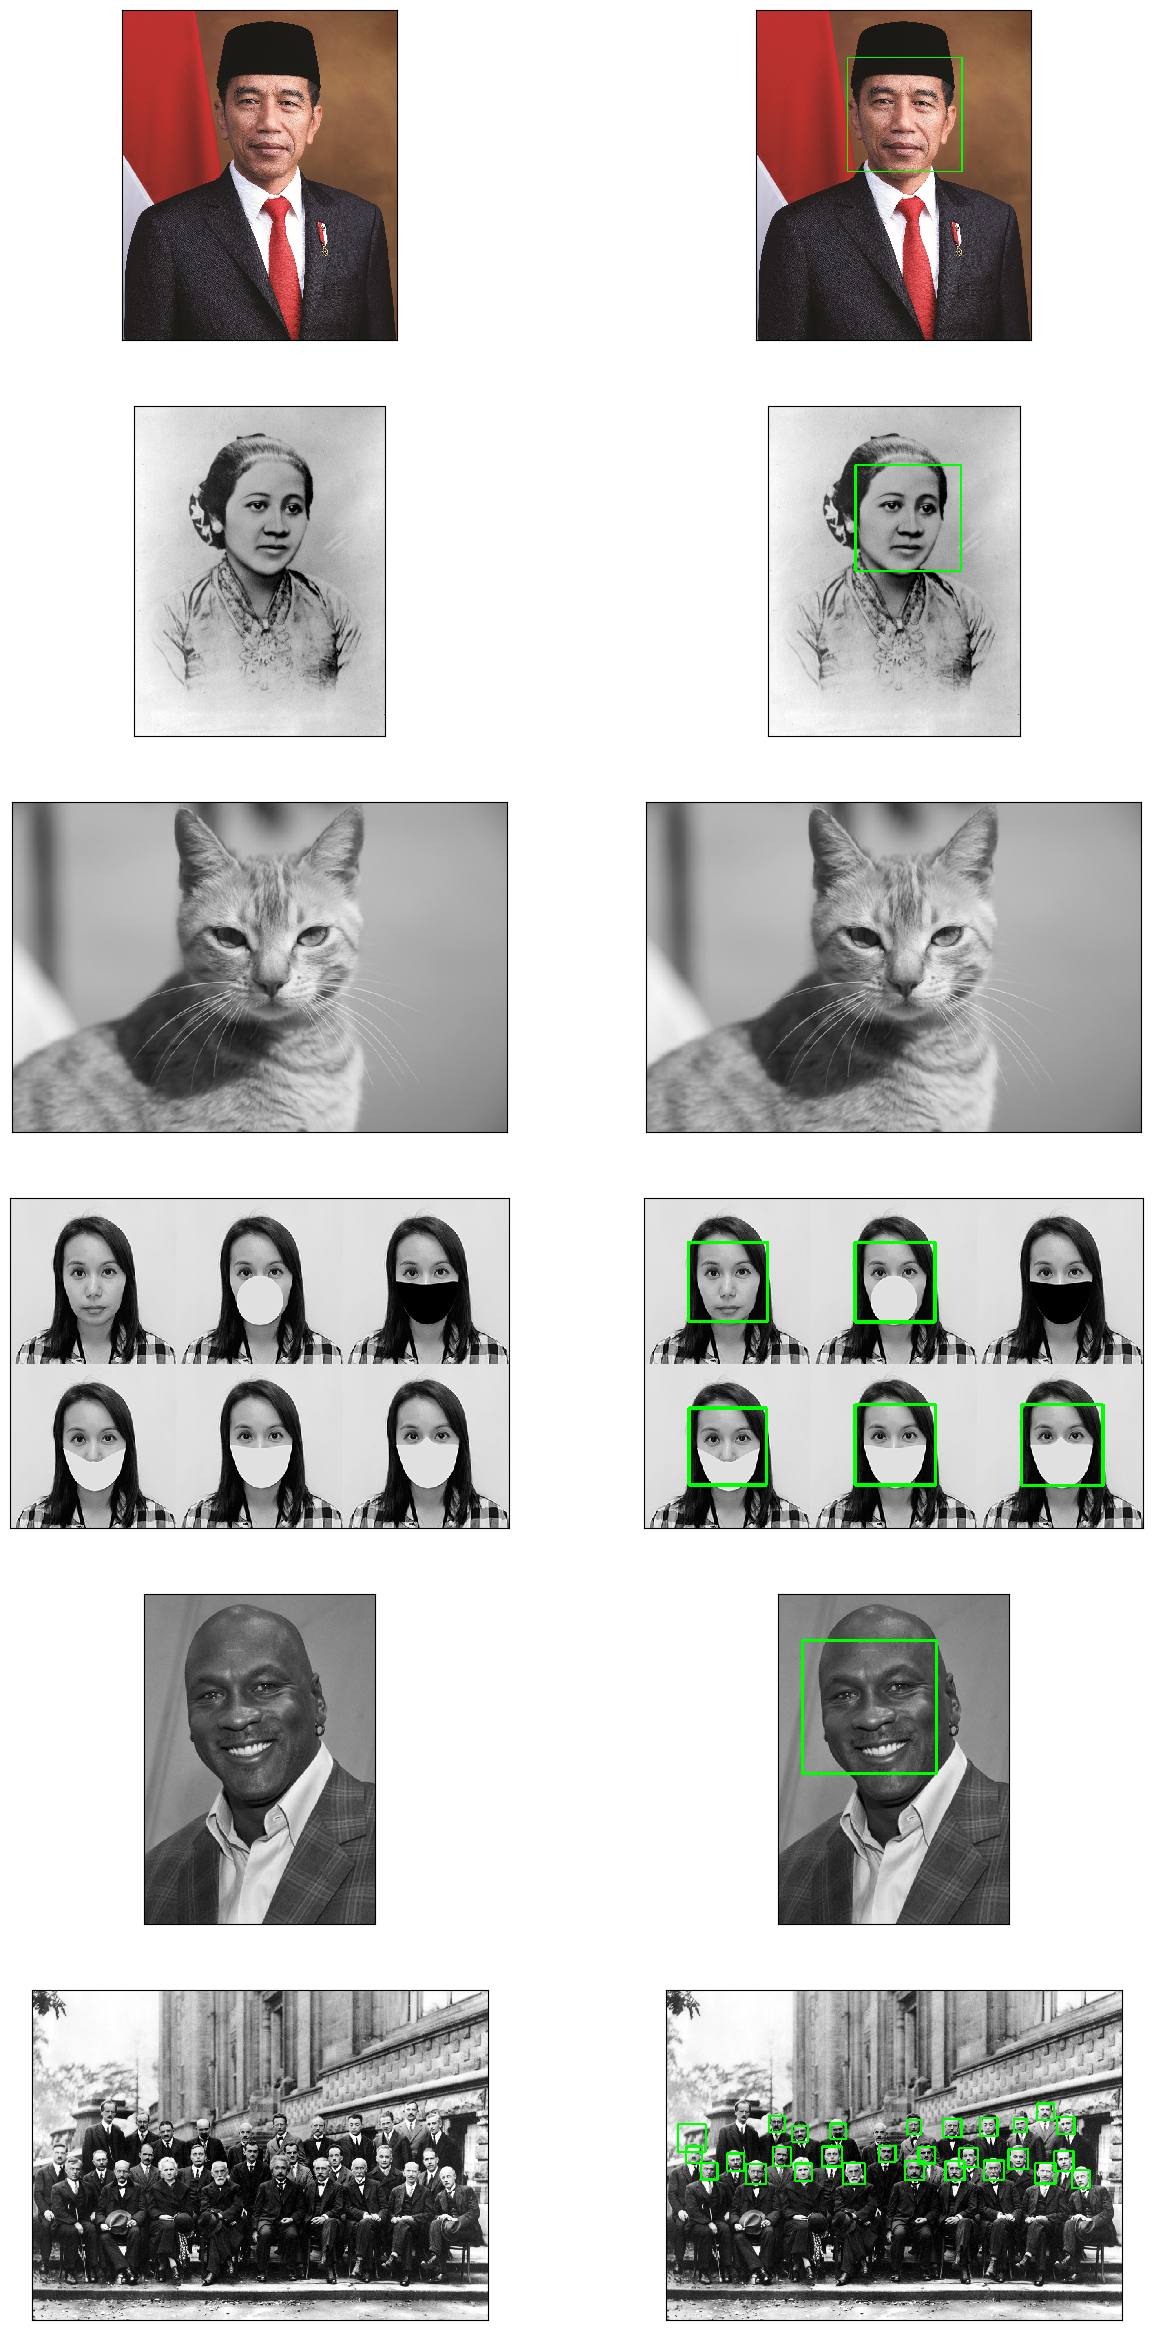

In [18]:
def detek_wajah(img):
  img_asli = img.copy()
  img_wajah = cv.cvtColor(img_asli,cv.COLOR_RGB2GRAY)
  roi_wajah = cascade_wajah.detectMultiScale(img_wajah)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(img_asli,(x,y),(x+w,y+h),(0,255,0),3)
  return img_asli

jokowi = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/jokowi.jpg')
kartini = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/kartini.jpg',0)
kucing = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mycat.jpg',0)
mask = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mask.png',0)
mjordan = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/mjordan.jpg',0)
solvay = cv.imread('/content/drive/MyDrive/PCVK/Images/facedet/solvayconf.jpg',0)

jokowi = cv.cvtColor(jokowi,cv.COLOR_BGR2RGB)
kartini = cv.cvtColor(kartini,cv.COLOR_BGR2RGB)
kucing = cv.cvtColor(kucing,cv.COLOR_BGR2RGB)
mask = cv.cvtColor(mask,cv.COLOR_BGR2RGB)
mjordan = cv.cvtColor(mjordan,cv.COLOR_BGR2RGB)
solvay = cv.cvtColor(solvay,cv.COLOR_BGR2RGB)
hasil1 = detek_wajah(jokowi)
hasil2 = detek_wajah(kartini)
hasil3 = detek_wajah(kucing)
hasil4 = detek_wajah(mask)
hasil5 = detek_wajah(mjordan)
hasil6 = detek_wajah(solvay)

images = [jokowi, hasil1, kartini, hasil2, kucing, hasil3, mask, hasil4, mjordan, hasil5, solvay, hasil6]

plt.figure(figsize = (15,30))
for i in range(len(images)):
  plt.subplot(6,2,i+1),plt.imshow(images[i], interpolation='nearest')
  plt.xticks([]),plt.yticks([])
plt.show()